# 전처리
|피쳐||||||||
|---|---|---|---|---|---|---|---|
|유로환율|Date|종가|시가|고가|저가|거래량|변동%|
|DAX|Date|종가|시가|고가|저가|거래량(백 만)|변동%|
|VSTOXX EUR|Date|종가|시가|고가|저가||변동%|
|EUROSTOXX50|Date|종가|시가|고가|저가||변동%|
|CAC|Date|종가|시가|고가|저가|거래량|변동%|
|협의통화|Date|M1|M2|M3||||

In [91]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [42]:
euro_df=pd.read_csv('EUR_KRW 과거 데이터.csv')

In [43]:
dax_df=pd.read_csv('DAX 과거 데이터.csv')
vstoxx_df=pd.read_csv('STOXX 50 Volatility VSTOXX EUR 과거 데이터.csv')
eurostoxx50_df=pd.read_csv('유로 스톡스 50 과거 데이터.csv')
cac_df=pd.read_csv('프랑스 CAC 과거 데이터.csv')

In [44]:
euro_df['종가']=euro_df['종가'].apply(lambda x: x.replace(',','')).astype(float)
euro_df['시가']=euro_df['시가'].apply(lambda x: x.replace(',','')).astype(float)
euro_df['고가']=euro_df['고가'].apply(lambda x: x.replace(',','')).astype(float)
euro_df['저가']=euro_df['저가'].apply(lambda x: x.replace(',','')).astype(float)
euro_df['거래량']=euro_df['거래량'].apply(lambda x: str(x).replace('M','') if x!=np.nan else x).astype(float)
euro_df['변동 %']=euro_df['변동 %'].apply(lambda x: x.replace('%','')).astype(float)

In [45]:
euro_df=euro_df.rename(columns={'날짜':'Date','종가':'Close','시가':'Open','저가':'Low','고가':'High'})
euro_df=euro_df.drop('변동 %',axis=1)
euro_df.Date=pd.to_datetime(euro_df.Date,format='%Y- %m- %d')

In [46]:
dax_df.columns=['Date','DAX_Close','DAX_Open','DAX_High','DAX_Low','DAX_Volume','DAX_Change']
dax_df.Date=pd.to_datetime(dax_df.Date,format='%Y- %m- %d')
dax_df['DAX_Close']=dax_df['DAX_Close'].apply(lambda x: x.replace(',','')).astype(float)
dax_df['DAX_Open']=dax_df['DAX_Open'].apply(lambda x: x.replace(',','')).astype(float)
dax_df['DAX_High']=dax_df['DAX_High'].apply(lambda x: x.replace(',','')).astype(float)
dax_df['DAX_Low']=dax_df['DAX_Low'].apply(lambda x: x.replace(',','')).astype(float)
dax_df['DAX_Volume']=dax_df['DAX_Volume'].apply(lambda x: str(x).replace('M','') if x!=np.nan else x).astype(float)
dax_df['DAX_Change']=dax_df['DAX_Change'].apply(lambda x: x.replace('%','')).astype(float)

eurostoxx50_df=eurostoxx50_df.drop('거래량',axis=1)
eurostoxx50_df.columns=['Date','EUROSTOXX50_Close','EUROSTOXX50_Open','EUROSTOXX50_High','EUROSTOXX50_Low','EUROSTOXX50_Change']
eurostoxx50_df.Date=pd.to_datetime(eurostoxx50_df.Date,format='%Y- %m- %d')
eurostoxx50_df['EUROSTOXX50_Close']=eurostoxx50_df['EUROSTOXX50_Close'].apply(lambda x: x.replace(',','')).astype(float)
eurostoxx50_df['EUROSTOXX50_Open']=eurostoxx50_df['EUROSTOXX50_Open'].apply(lambda x: x.replace(',','')).astype(float)
eurostoxx50_df['EUROSTOXX50_High']=eurostoxx50_df['EUROSTOXX50_High'].apply(lambda x: x.replace(',','')).astype(float)
eurostoxx50_df['EUROSTOXX50_Low']=eurostoxx50_df['EUROSTOXX50_Low'].apply(lambda x: x.replace(',','')).astype(float)
eurostoxx50_df['EUROSTOXX50_Change']=eurostoxx50_df['EUROSTOXX50_Change'].apply(lambda x: x.replace('%','')).astype(float)

cac_df.columns=['Date','CAC_Close','CAC_Open','CAC_High','CAC_Low','CAC_Volume','CAC_Change']
cac_df.Date=pd.to_datetime(cac_df.Date,format='%Y- %m- %d')
cac_df['CAC_Close']=cac_df['CAC_Close'].apply(lambda x: x.replace(',','')).astype(float)
cac_df['CAC_Open']=cac_df['CAC_Open'].apply(lambda x: x.replace(',','')).astype(float)
cac_df['CAC_High']=cac_df['CAC_High'].apply(lambda x: x.replace(',','')).astype(float)
cac_df['CAC_Low']=cac_df['CAC_Low'].apply(lambda x: x.replace(',','')).astype(float)
cac_df['CAC_Volume']=cac_df['CAC_Volume'].apply(lambda x: str(x).replace('M','') if x!=np.nan else x).astype(float)
cac_df['CAC_Change']=cac_df['CAC_Change'].apply(lambda x: x.replace('%','')).astype(float)

dax_df=dax_df.drop(['DAX_Volume','DAX_Change'],axis=1)
eurostoxx50_df=eurostoxx50_df.drop('EUROSTOXX50_Change',axis=1)
cac_df=cac_df.drop(['CAC_Volume','CAC_Change'],axis=1)

In [47]:
all_df=pd.merge(dax_df,eurostoxx50_df,how='inner',on='Date')
all_df=pd.merge(all_df,cac_df,how='inner',on='Date')
all_df=pd.merge(all_df,euro_df,how='inner',on='Date')

In [48]:
df_base=all_df

In [49]:
df_base=df_base.replace([np.inf,-np.inf],np.nan)
df_base=df_base.loc[:,df_base.isnull().mean()<0.05]

In [50]:
df_base=df_base.dropna()

In [51]:
print(list(df_base))

['Date', 'DAX_Close', 'DAX_Open', 'DAX_High', 'DAX_Low', 'EUROSTOXX50_Close', 'EUROSTOXX50_Open', 'EUROSTOXX50_High', 'EUROSTOXX50_Low', 'CAC_Close', 'CAC_Open', 'CAC_High', 'CAC_Low', 'Close', 'Open', 'High', 'Low']


# 모델링

In [121]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [154]:
def ensemble_predict(timelength, alpha=0.5):
    """
    새로운 입력 데이터 new_df를 넣으면 XGBoost, LSTM, RandomForest, 앙상블 예측 결과 반환 + 결과 비교표 출력

    Parameters:
    - new_df: 예측 대상 DataFrame
    - alpha: 가중 평균에서 XGBoost의 비중 (0.0 ~ 1.0)

    Returns:
    - result_dict: 예측 결과 딕셔너리
    - result_df: Close와 y_meta를 비교한 결과 DataFrame
    """
    import joblib
    
    scaler_X = joblib.load(f'scaler_X_up_{timelength}.pkl')

    scaler_y = joblib.load(f'scaler_y_up_{timelength}.pkl')
    
    meta_xgb = joblib.load(f'meta_xgb_model_up_{timelength}.pkl')

    import pickle

    with open('real_times.pkl', 'rb') as f:
        real_times = pickle.load(f)
    
    with open('euro_indicator.pkl', 'rb') as f:
        euro_indicator = pickle.load(f)
    
    new_df=pd.merge(real_times('EURKRW=X',days=50),euro_indicator(days=50),on='Date').tail(21)
    
    new_df=new_df.replace([np.inf,-np.inf],np.nan)
    new_df=new_df.dropna()

    # ✅ 1. 전처리
    X_new = new_df[['DAX_Close', 'DAX_Open', 'DAX_High', 'DAX_Low', 'EUROSTOXX50_Close', 'EUROSTOXX50_Open', 'EUROSTOXX50_High', 'EUROSTOXX50_Low', 'CAC_Close', 'CAC_Open', 'CAC_High', 'CAC_Low', 'Close', 'Open', 'High', 'Low']]
    X_new_scaled = scaler_X.transform(X_new)

    # ✅ 2. 입력 길이 검사
    num_samples = len(X_new_scaled) - seq_len
    if num_samples <= 0:
        raise ValueError(
            f"[❌ 입력 부족] 최소 {seq_len + 1}개의 데이터가 필요합니다. "
            f"현재 {len(X_new_scaled)}개 행을 입력받았습니다."
        )

    # ✅ 3. 시계열 입력 (LSTM용)
    X_new_seq = np.array([
        X_new_scaled[i:i+seq_len] for i in range(num_samples)
    ])

    # ✅ 4. flat 입력 (XGB, RF용)
    X_new_flat = X_new_scaled[seq_len:]

    # ✅ 5. 각 모델 예측
    y_xgb = model_xgb.predict(X_new_flat)
    y_rf = model_rf.predict(X_new_flat)
    y_lstm = model_lstm.predict(X_new_seq)

    # ✅ 6. 역정규화
    y_xgb = scaler_y.inverse_transform(y_xgb.reshape(-1, 1)).reshape(-1)
    y_rf  = scaler_y.inverse_transform(y_rf.reshape(-1, 1)).reshape(-1)
    y_lstm = scaler_y.inverse_transform(y_lstm).reshape(-1)

    # ✅ 7. 메타 모델 입력
    X_meta = np.column_stack([
        y_xgb,
        y_lstm,
        y_rf,
        y_xgb - y_lstm,
        y_xgb / (y_lstm + 1e-6),
        y_xgb - y_rf,
        y_rf / (y_lstm + 1e-6),
    ])

    # ✅ 8. 앙상블 예측
    y_lr   = meta_lr.predict(X_meta)
    y_meta = meta_xgb.predict(X_meta)
    y_wa   = alpha * y_xgb + (1 - alpha) * y_lstm

    # ✅ 9. 비교 대상 Close 값 추출
    close_values = new_df['Close'].values[seq_len:]

    # ✅ 10. 결과 비교표 생성
    result_df = pd.DataFrame({
        "Date": new_df['Date'].iloc[-1],
        "Previous Close": close_values,
        "Predicted Close": y_meta,
        "예측결과": np.where(y_meta > close_values, "상승", "하락")
    })

    # ✅ 11. 예측 결과 딕셔너리
    result_dict = {
        'MetaXGBoost': y_meta
    }

    return result_df


In [152]:
ensemble_predict('한달')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


,Date,Previous Close,Predicted Close,예측결과
0,2025-07-29,1615.5,1452.263672,하락


In [156]:
import cloudpickle
with open("유로최종본.pkl", "wb") as f:
    cloudpickle.dump(ensemble_predict, f)

In [120]:
import pickle

with open('real_times.pkl', 'rb') as f:
    real_times = pickle.load(f)

with open('euro_indicator.pkl', 'rb') as f:
    euro_indicator = pickle.load(f)

test_df=pd.merge(real_times('EURKRW=X',days=20),euro_indicator(days=20),on='Date').tail(11)
ensemble_predict(test_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


({'MetaXGBoost': array([1614.3353], dtype=float32)},
         Date  Previous Close  Predicted Close 예측결과
 0 2025-07-29     1616.199951      1614.335327   하락)

In [105]:
import cloudpickle
with open("alpha_values.pkl", "wb") as f:
    cloudpickle.dump(alpha_values, f)

,Date,DAX_Open,DAX_High,DAX_Low,DAX_Close,DAX_Volume,EUROSTOXX50_Open,EUROSTOXX50_High,EUROSTOXX50_Low,EUROSTOXX50_Close,EUROSTOXX50_Volume,CAC_Open,CAC_High,CAC_Low,CAC_Close,CAC_Volume
0,2025-07-01,23966.949219,23978.300781,23671.269531,23673.289062,61850200,5308.009766,5314.390137,5265.939941,5282.430176,19996900,7674.540039,7675.689941,7612.390137,7662.589844,56189700
1,2025-07-02,23789.060547,23824.500000,23620.419922,23790.109375,53388000,5294.270020,5323.529785,5285.250000,5318.720215,23507800,7710.720215,7770.450195,7674.229980,7738.419922,64521800
2,2025-07-03,23884.800781,23944.099609,23762.419922,23934.130859,46650200,5325.850098,5343.149902,5302.589844,5343.149902,19117600,7763.250000,7766.919922,7717.069824,7754.549805,51421200
3,2025-07-04,23833.140625,23868.929688,23702.650391,23787.449219,34239700,5320.939941,5320.939941,5274.879883,5288.810059,14290600,7713.540039,7713.540039,7656.689941,7696.270020,39006400
4,2025-07-07,23845.880859,24073.669922,23836.580078,24073.669922,39606000,5292.790039,5341.540039,5289.189941,5341.540039,18338300,7704.209961,7730.979980,7682.120117,7723.470215,49271000
5,2025-07-08,24135.740234,24244.089844,24063.419922,24206.910156,60796000,5346.330078,5375.410156,5333.529785,5371.950195,22869400,7743.569824,7771.620117,7696.379883,7766.709961,54942400
6,2025-07-09,24278.890625,24609.150391,24261.009766,24549.560547,60620400,5382.029785,5451.700195,5382.029785,5445.649902,27890300,7799.330078,7886.790039,7790.549805,7878.459961,59300100
7,2025-07-10,24638.580078,24639.099609,24450.970703,24456.810547,58767400,5452.299805,5470.810059,5434.950195,5438.270020,22942900,7909.859863,7940.620117,7885.870117,7902.250000,52841500
8,2025-07-11,24333.109375,24369.050781,24166.630859,24255.310547,45562600,5423.000000,5423.000000,5370.169922,5383.479980,20740800,7873.430176,7881.189941,7815.189941,7829.290039,48937000
9,2025-07-14,24038.289062,24168.140625,23975.460938,24160.640625,42197100,5357.500000,5371.209961,5337.640137,5370.850098,15696500,7774.040039,7810.549805,7764.799805,7808.169922,40409300


# 하루 예측

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
🏆 Best Method: Meta_XGBoost_Extended
MAE:  2.9207
RMSE: 3.8346
R²:   0.9960


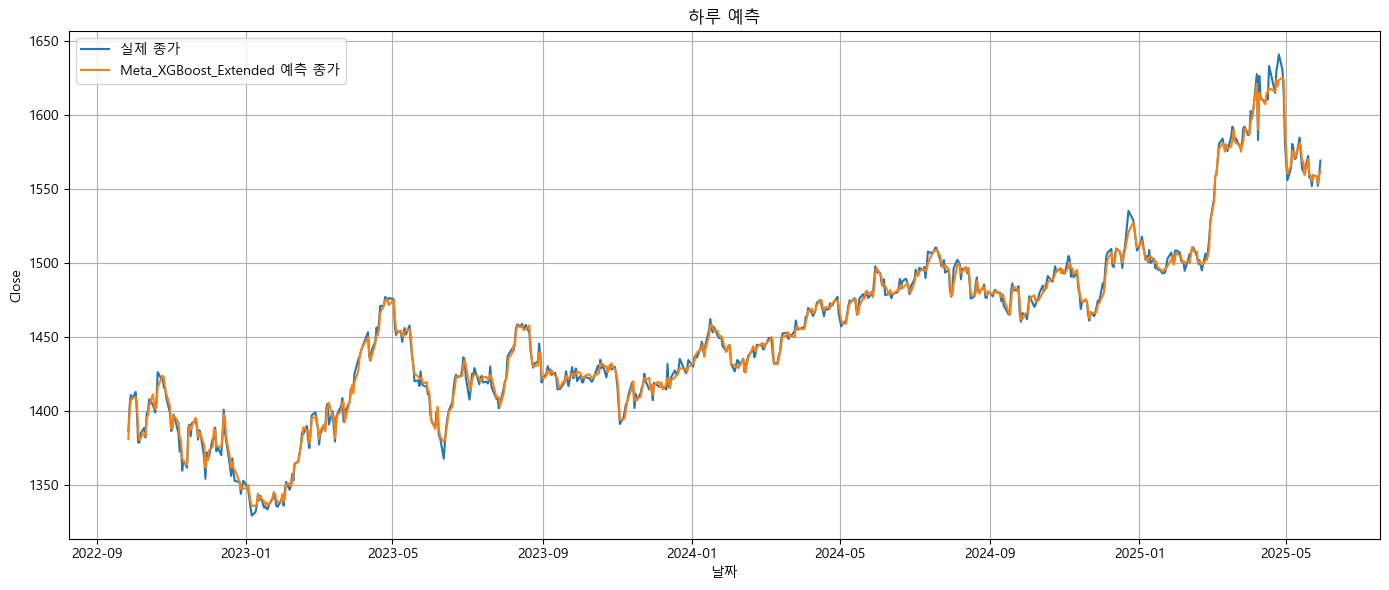

In [141]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-1)
df = df.dropna().reset_index(drop=True)

drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 3. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 4. 정규화 (학습 데이터 기준)
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 5. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 6. 모델 학습
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 7. 실제값
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 8. 메타모델 + 가중 평균 조합
meta_results = []

# LinearRegression (확장 특성)
X_meta = np.column_stack([
    y_pred_xgb,
    y_pred_lstm,
    y_pred_rf,
    y_pred_xgb - y_pred_lstm,
    y_pred_xgb / (y_pred_lstm + 1e-6),
    y_pred_xgb - y_pred_rf,
    y_pred_rf / (y_pred_lstm + 1e-6),
])
meta_lr = LinearRegression().fit(X_meta, y_true)
y_pred_lr = meta_lr.predict(X_meta)
meta_results.append({
    'method': 'LinearRegression_Extended',
    'y_pred': y_pred_lr,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_lr)),
    'mae': mean_absolute_error(y_true, y_pred_lr),
    'r2': r2_score(y_true, y_pred_lr)
})

# Meta XGBoost
meta_xgb = XGBRegressor(n_estimators=100, learning_rate=0.05)
meta_xgb.fit(X_meta, y_true)
y_pred_meta = meta_xgb.predict(X_meta)
meta_results.append({
    'method': 'Meta_XGBoost_Extended',
    'y_pred': y_pred_meta,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_meta)),
    'mae': mean_absolute_error(y_true, y_pred_meta),
    'r2': r2_score(y_true, y_pred_meta)
})

# Weighted Average
for alpha in np.arange(0.0, 1.05, 0.1):
    y_pred_wa = alpha * y_pred_xgb + (1 - alpha) * y_pred_lstm
    meta_results.append({
        'method': f'Weighted_α={alpha:.1f}',
        'y_pred': y_pred_wa,
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_wa)),
        'mae': mean_absolute_error(y_true, y_pred_wa),
        'r2': r2_score(y_true, y_pred_wa)
    })

# 9. 결과 출력 및 시각화
meta_results = sorted(meta_results, key=lambda x: x['rmse'])
best = meta_results[0]

print(f"🏆 Best Method: {best['method']}")
print(f"MAE:  {best['mae']:.4f}")
print(f"RMSE: {best['rmse']:.4f}")
print(f"R²:   {best['r2']:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(best['y_pred']))
plt.figure(figsize=(14,6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가')
plt.plot(date_test[:n], best['y_pred'][:n], label=f'{best['method']} 예측 종가')
plt.title("하루 예측")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [142]:
import joblib
joblib.dump(meta_xgb, 'meta_xgb_model_up_하루.pkl')               # Meta XGB 저장
joblib.dump(scaler_X, 'scaler_X_up_하루.pkl')                     # X 스케일러 저장
joblib.dump(scaler_y, 'scaler_y_up_하루.pkl')                     # y 스케일러 저장

['scaler_y_up_하루.pkl']

# 한달 예측

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
🏆 Best Method: Meta_XGBoost_Extended
MAE:  6.7909
RMSE: 9.1312
R²:   0.9773


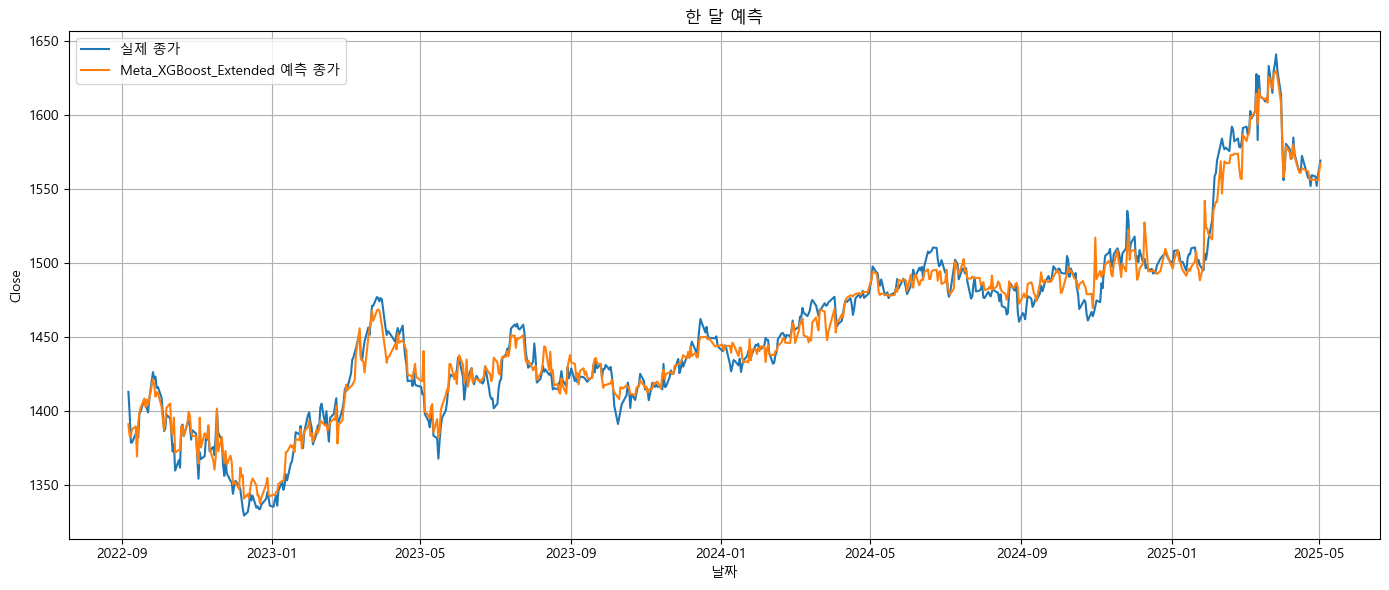

In [143]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-20)
df = df.dropna().reset_index(drop=True)

drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 3. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 4. 정규화 (학습 데이터 기준)
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 5. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 6. 모델 학습
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 7. 실제값
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 8. 메타모델 + 가중 평균 조합
meta_results = []

# LinearRegression (확장 특성)
X_meta = np.column_stack([
    y_pred_xgb,
    y_pred_lstm,
    y_pred_rf,
    y_pred_xgb - y_pred_lstm,
    y_pred_xgb / (y_pred_lstm + 1e-6),
    y_pred_xgb - y_pred_rf,
    y_pred_rf / (y_pred_lstm + 1e-6),
])
meta_lr = LinearRegression().fit(X_meta, y_true)
y_pred_lr = meta_lr.predict(X_meta)
meta_results.append({
    'method': 'LinearRegression_Extended',
    'y_pred': y_pred_lr,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_lr)),
    'mae': mean_absolute_error(y_true, y_pred_lr),
    'r2': r2_score(y_true, y_pred_lr)
})

# Meta XGBoost
meta_xgb = XGBRegressor(n_estimators=100, learning_rate=0.05)
meta_xgb.fit(X_meta, y_true)
y_pred_meta = meta_xgb.predict(X_meta)
meta_results.append({
    'method': 'Meta_XGBoost_Extended',
    'y_pred': y_pred_meta,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_meta)),
    'mae': mean_absolute_error(y_true, y_pred_meta),
    'r2': r2_score(y_true, y_pred_meta)
})

# Weighted Average
for alpha in np.arange(0.0, 1.05, 0.1):
    y_pred_wa = alpha * y_pred_xgb + (1 - alpha) * y_pred_lstm
    meta_results.append({
        'method': f'Weighted_α={alpha:.1f}',
        'y_pred': y_pred_wa,
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_wa)),
        'mae': mean_absolute_error(y_true, y_pred_wa),
        'r2': r2_score(y_true, y_pred_wa)
    })

# 9. 결과 출력 및 시각화
meta_results = sorted(meta_results, key=lambda x: x['rmse'])
best = meta_results[0]

print(f"🏆 Best Method: {best['method']}")
print(f"MAE:  {best['mae']:.4f}")
print(f"RMSE: {best['rmse']:.4f}")
print(f"R²:   {best['r2']:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(best['y_pred']))
plt.figure(figsize=(14,6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가')
plt.plot(date_test[:n], best['y_pred'][:n], label=f'{best['method']} 예측 종가')
plt.title("한 달 예측")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [144]:
joblib.dump(meta_xgb, 'meta_xgb_model_up_한달.pkl')
joblib.dump(scaler_X, 'scaler_X_up_한달.pkl')
joblib.dump(scaler_y, 'scaler_y_up_한달.pkl')

['scaler_y_up_한달.pkl']

# 세달 예측

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
🏆 Best Method: Meta_XGBoost_Extended
MAE:  7.2873
RMSE: 10.0517
R²:   0.9724


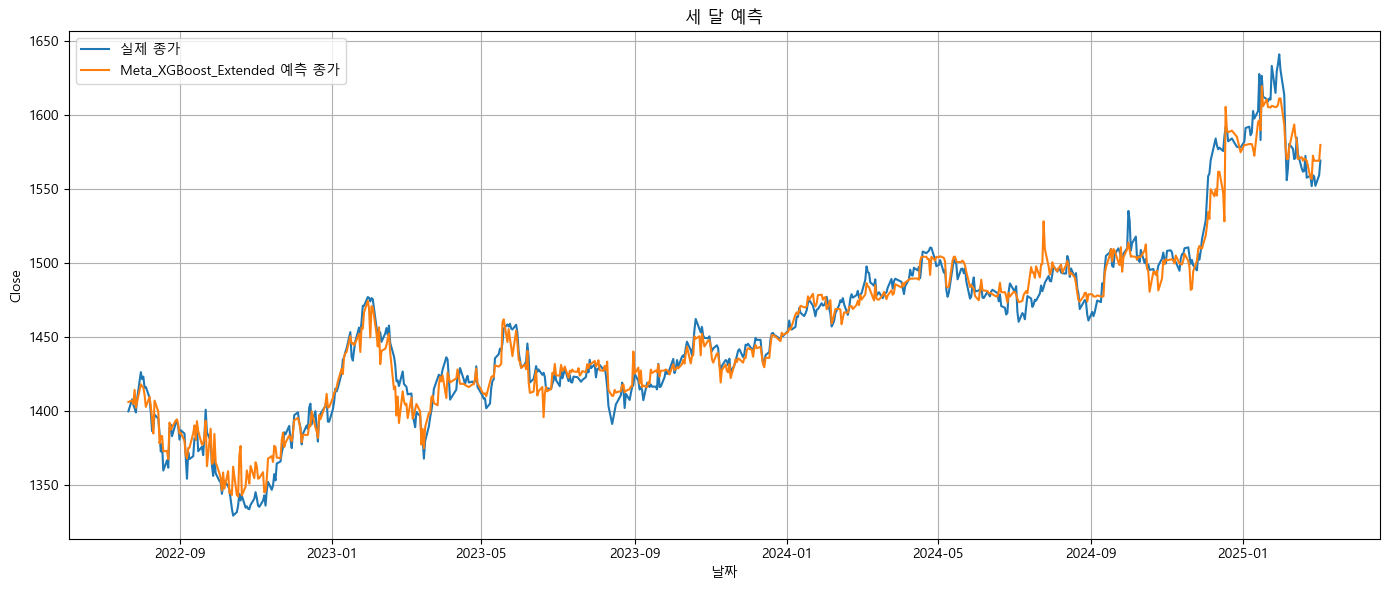

In [145]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-60)
df = df.dropna().reset_index(drop=True)

drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 3. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 4. 정규화 (학습 데이터 기준)
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 5. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 6. 모델 학습
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 7. 실제값
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 8. 메타모델 + 가중 평균 조합
meta_results = []

# LinearRegression (확장 특성)
X_meta = np.column_stack([
    y_pred_xgb,
    y_pred_lstm,
    y_pred_rf,
    y_pred_xgb - y_pred_lstm,
    y_pred_xgb / (y_pred_lstm + 1e-6),
    y_pred_xgb - y_pred_rf,
    y_pred_rf / (y_pred_lstm + 1e-6),
])
meta_lr = LinearRegression().fit(X_meta, y_true)
y_pred_lr = meta_lr.predict(X_meta)
meta_results.append({
    'method': 'LinearRegression_Extended',
    'y_pred': y_pred_lr,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_lr)),
    'mae': mean_absolute_error(y_true, y_pred_lr),
    'r2': r2_score(y_true, y_pred_lr)
})

# Meta XGBoost
meta_xgb = XGBRegressor(n_estimators=100, learning_rate=0.05)
meta_xgb.fit(X_meta, y_true)
y_pred_meta = meta_xgb.predict(X_meta)
meta_results.append({
    'method': 'Meta_XGBoost_Extended',
    'y_pred': y_pred_meta,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_meta)),
    'mae': mean_absolute_error(y_true, y_pred_meta),
    'r2': r2_score(y_true, y_pred_meta)
})

# Weighted Average
for alpha in np.arange(0.0, 1.05, 0.1):
    y_pred_wa = alpha * y_pred_xgb + (1 - alpha) * y_pred_lstm
    meta_results.append({
        'method': f'Weighted_α={alpha:.1f}',
        'y_pred': y_pred_wa,
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_wa)),
        'mae': mean_absolute_error(y_true, y_pred_wa),
        'r2': r2_score(y_true, y_pred_wa)
    })

# 9. 결과 출력 및 시각화
meta_results = sorted(meta_results, key=lambda x: x['rmse'])
best = meta_results[0]

print(f"🏆 Best Method: {best['method']}")
print(f"MAE:  {best['mae']:.4f}")
print(f"RMSE: {best['rmse']:.4f}")
print(f"R²:   {best['r2']:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(best['y_pred']))
plt.figure(figsize=(14,6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가')
plt.plot(date_test[:n], best['y_pred'][:n], label=f'{best['method']} 예측 종가')
plt.title("세 달 예측")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [146]:
joblib.dump(meta_xgb, 'meta_xgb_model_up_세달.pkl')               # Meta XGB 저장
joblib.dump(scaler_X, 'scaler_X_up_세달.pkl')                     # X 스케일러 저장
joblib.dump(scaler_y, 'scaler_y_up_세달.pkl')                     # y 스케일러 저장

['scaler_y_up_세달.pkl']

# 일년 예측

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
🏆 Best Method: Meta_XGBoost_Extended
MAE:  5.9672
RMSE: 8.2977
R²:   0.9809


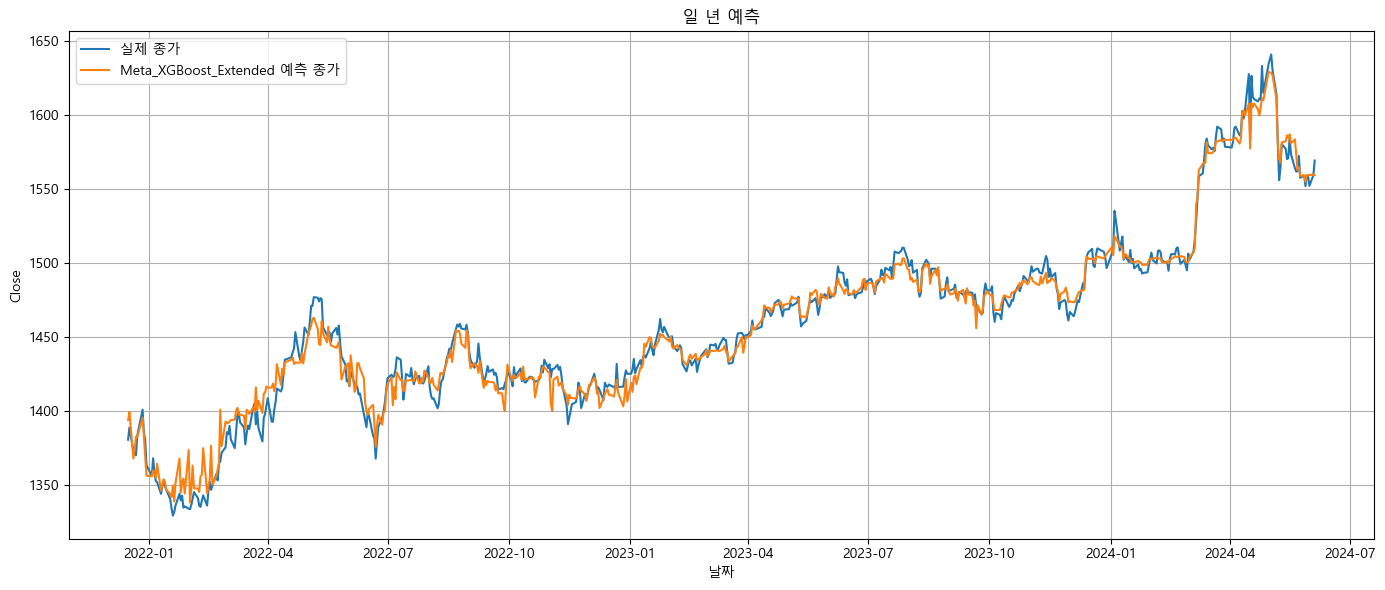

In [147]:
# 1. 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. 데이터 준비
df = df_base.copy()
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-250)
df = df.dropna().reset_index(drop=True)

drop_cols = ['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 3. 학습/테스트 분할
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 4. 정규화 (학습 데이터 기준)
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 5. 시퀀스 생성 함수
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 6. 모델 학습
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 7. 실제값
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 8. 메타모델 + 가중 평균 조합
meta_results = []

# LinearRegression (확장 특성)
X_meta = np.column_stack([
    y_pred_xgb,
    y_pred_lstm,
    y_pred_rf,
    y_pred_xgb - y_pred_lstm,
    y_pred_xgb / (y_pred_lstm + 1e-6),
    y_pred_xgb - y_pred_rf,
    y_pred_rf / (y_pred_lstm + 1e-6),
])
meta_lr = LinearRegression().fit(X_meta, y_true)
y_pred_lr = meta_lr.predict(X_meta)
meta_results.append({
    'method': 'LinearRegression_Extended',
    'y_pred': y_pred_lr,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_lr)),
    'mae': mean_absolute_error(y_true, y_pred_lr),
    'r2': r2_score(y_true, y_pred_lr)
})

# Meta XGBoost
meta_xgb = XGBRegressor(n_estimators=100, learning_rate=0.05)
meta_xgb.fit(X_meta, y_true)
y_pred_meta = meta_xgb.predict(X_meta)
meta_results.append({
    'method': 'Meta_XGBoost_Extended',
    'y_pred': y_pred_meta,
    'rmse': np.sqrt(mean_squared_error(y_true, y_pred_meta)),
    'mae': mean_absolute_error(y_true, y_pred_meta),
    'r2': r2_score(y_true, y_pred_meta)
})

# Weighted Average
for alpha in np.arange(0.0, 1.05, 0.1):
    y_pred_wa = alpha * y_pred_xgb + (1 - alpha) * y_pred_lstm
    meta_results.append({
        'method': f'Weighted_α={alpha:.1f}',
        'y_pred': y_pred_wa,
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_wa)),
        'mae': mean_absolute_error(y_true, y_pred_wa),
        'r2': r2_score(y_true, y_pred_wa)
    })

# 9. 결과 출력 및 시각화
meta_results = sorted(meta_results, key=lambda x: x['rmse'])
best = meta_results[0]

print(f"🏆 Best Method: {best['method']}")
print(f"MAE:  {best['mae']:.4f}")
print(f"RMSE: {best['rmse']:.4f}")
print(f"R²:   {best['r2']:.4f}")

# 10. 시각화
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(best['y_pred']))
plt.figure(figsize=(14,6))
plt.plot(date_test[:n], y_true[:n], label='실제 종가')
plt.plot(date_test[:n], best['y_pred'][:n], label=f'{best['method']} 예측 종가')
plt.title("일 년 예측")
plt.xlabel("날짜")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [148]:
joblib.dump(meta_xgb, 'meta_xgb_model_up_일년.pkl')               # Meta XGB 저장
joblib.dump(scaler_X, 'scaler_X_up_일년.pkl')                     # X 스케일러 저장
joblib.dump(scaler_y, 'scaler_y_up_일년.pkl')                     # y 스케일러 저장

['scaler_y_up_일년.pkl']

# 실시간